Data shape (2672, 10) (2672, 4)


C:\Users\dexte\AppData\Local\Temp\ipykernel_22068\185599371.py:59: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


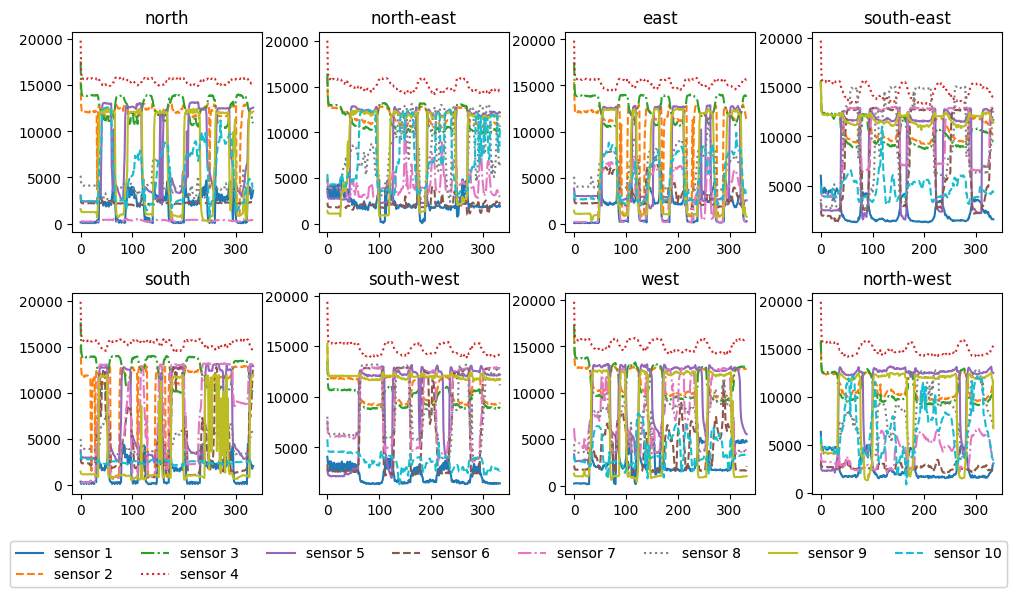

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from skimage.feature import hog
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

path="C:/Users/dexte/Documents/GitHub/TactileSensor/Assets/Recorded_data/"
names=["north","north-east","east","south-east","south","south-west","west","north-west"]
y_=[[1,1,
    0,0],[1,1,
          0,1],[0,1,
                0,1],[0,1,
                      1,1],[0,0,
                            1,1],[1,0,
                                  1,1],[1,0,
                                        1,0],[1,1,
                                              1,0]]

0,1,2,3,4,5,6,7
0,0,0,0,1,1,1,1
0,1,2,3,0,1,2,3
X=None
y__=None
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

for i in range(len(names)): #load each item of data into the file
    filename=path+names[i]+".npy"
    data=np.load(filename)
    a=0
    b=0
    if i<4: 
        a=0
        b=i
    else: 
        a=1
        b=i-4
    d=data.T
    for j in range(10):
        axs[a, b].plot(d[j],label="sensor "+str(j+1),linestyle=linestyles[j])
    axs[a, b].set_title(names[i])
    

    if type(X)==type(None): 
        X=data
        y__=np.zeros((data.shape[0],4))+y_[i]
    else: 
        X=np.concatenate([X,data],axis=0)
        y__=np.concatenate([y__,np.zeros((data.shape[0],4))+y_[i]],axis=0)

print("Data shape",X.shape,y__.shape)
# Adjust the layout

common_legend = plt.legend(loc='lower center', bbox_to_anchor=(-1.6, -0.5), ncol=8)
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust these values as needed
fig.add_artist(common_legend)
plt.tight_layout()

# Show the figure
plt.show()

In [139]:
x, x_test, y, y_test = train_test_split(X, y__, test_size=0.20, random_state=42)

In [156]:
#make temporal data
def gen_temporal_data(X_,y_,T):
    X=X_.copy()
    y=y_.copy()
    temp_x=np.zeros((X.shape[0]-T,X.shape[1]*T))
    temp_y=np.zeros((X.shape[0]-T,4))
    for j in range(len(y_)): #loop through classes
        for i in range(X.shape[0]//len(y_) -T): #loop through classed data
            idx=(j*(X.shape[0]//len(y)))+i
            ar=[X[idx+k] for k in range(T)]
            temp_x[idx]=np.concatenate(ar,axis=0)
            temp_y[idx]=y_[j]

    x=temp_x
    y=temp_y
    x, x_test, y, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    return x, x_test, y, y_test
x, x_test, y, y_test = gen_temporal_data(X,y_,1)

## regression

In [157]:
clf = Ridge(alpha=1.0)
clf.fit(x, y)
coords=clf.predict(x)
coords=np.round(coords,0)
error=np.sum(np.abs(coords-y))/(4*len(coords))
print("Train Error",round(error*100,2),"%","Accuracy",100-round(error*100,2),"%")

Train Error 16.68 % Accuracy 83.32 %


In [158]:
coords=clf.predict(x_test)
coords=np.round(coords,0)
error=np.sum(np.abs(coords-y_test))/(4*len(coords))
print("Test Error",round(error*100,2),"%","Accuracy",100-round(error*100,2),"%")

Test Error 14.3 % Accuracy 85.7 %


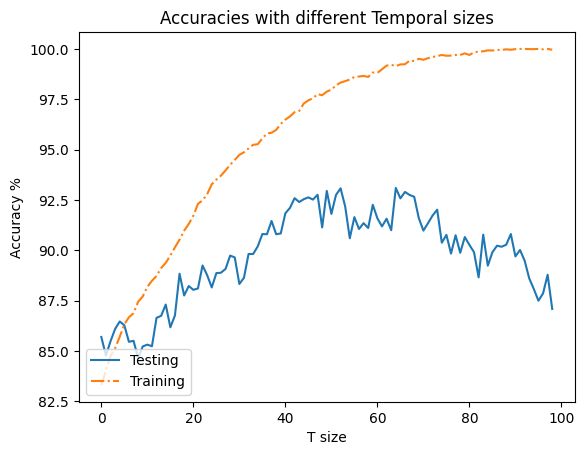

In [163]:
a=[]
tr=[]
for t in range(1,100): #experiment with different T sizes
    x, x_test, y, y_test = gen_temporal_data(X,y_,t)
    clf = Ridge(alpha=1.0)
    clf.fit(x, y)
    coords=clf.predict(x)
    coords=np.round(coords,0)
    error=np.sum(np.abs(coords-y))/(4*len(coords))
    tr.append(100-round(error*100,2))
    coords=clf.predict(x_test)
    coords=np.round(coords,0)
    error=np.sum(np.abs(coords-y_test))/(4*len(coords))
    a.append(100-round(error*100,2))

plt.plot(a,"-",label="Testing")
plt.plot(tr,'-.',label="Training")
plt.legend(loc="lower left")
plt.title("Accuracies with different Temporal sizes")
plt.xlabel("T size")
plt.ylabel("Accuracy %")
plt.show()


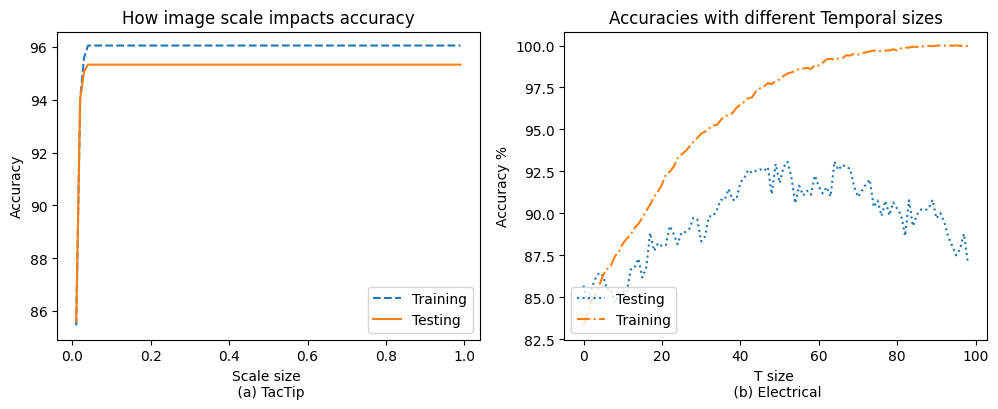

In [164]:
trained=np.load("C:/Users/dexte/Documents/GitHub/TactileSensor/Code/Data collection/TacTip vs pressure/accuracyTrain.npy")
plotted=np.load("C:/Users/dexte/Documents/GitHub/TactileSensor/Code/Data collection/TacTip vs pressure/accuracyTest.npy")
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(np.arange(0.01,1,0.01),plotted,label="Testing")
axs[0].plot(np.arange(0.01,1,0.01),trained,"--",label="Training")
axs[0].set_title("How image scale impacts accuracy")
axs[0].set_xlabel("Scale size \n (a) TacTip")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")

axs[1].plot(a,":",label="Testing")
axs[1].plot(tr,'-.',label="Training")
axs[1].legend(loc="lower left")
axs[1].set_title("Accuracies with different Temporal sizes")
axs[1].set_xlabel("T size \n (b) Electrical")
axs[1].set_ylabel("Accuracy %")

plt.show()
